## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.columns = ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity','Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons','Holiday', 'Functioning Day']

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

- 데이터 전처리 ( Data Preparation )

In [6]:
df['Month'] = df['Date'].apply(lambda x: x.split('/')[1] + '월')

In [7]:
df['Month']

0       12월
1       12월
2       12월
3       12월
4       12월
       ... 
8755    11월
8756    11월
8757    11월
8758    11월
8759    11월
Name: Month, Length: 8760, dtype: object

In [8]:
# 카테고리 변수 -> one-hot encoding
pd.get_dummies(df , columns=['Seasons'])
#[,'Holiday','Functioning','Month'])

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Functioning Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12월,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12월,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,12월,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12월,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,12월,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes,11월,1,0,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes,11월,1,0,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes,11월,1,0,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes,11월,1,0,0,0


In [9]:
df_enc = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Month'])
df_enc.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,...,Month_03월,Month_04월,Month_05월,Month_06월,Month_07월,Month_08월,Month_09월,Month_10월,Month_11월,Month_12월
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
X = df_enc[df_enc.columns.difference(['Rented Bike Count', 'Date'])]

In [11]:
y = df_enc['Rented Bike Count']

In [12]:
X.shape , y.shape

((8760, 29), (8760,))

>  Train set 과 Test set 분리
> 80 % : 20 $

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [14]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7008, 29), (1752, 29), (7008,), (1752,))

 - 모델링 선형회귀

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()
# fit 함수의 의미가 ' 학습 ' (오차를 최소화 하는 가중치를 구하는 계산 수행)
reg.fit(X=X_train[['Temperature']], y=y_train)

LinearRegression()

In [17]:
# w_0
reg.intercept_

331.78038016740726

In [18]:
# w_1
reg.coef_

array([29.34160985])

In [19]:
x= 30 
reg.intercept_ + reg.coef_[0] * x

1212.0286755881673

In [20]:
reg.predict([[30]
             ,[35],
             [0],
             [-10]])

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1212.02867559, 1358.73672482,  331.78038017,   38.36428169])

In [21]:
#모델 평가 ( MAE , R ^ 2)
#test_set 에 예측값
y_pred = reg.predict(X_test[['Temperature']])


In [22]:
# MAE
abs(y_pred - y_test).mean()

416.2653398260372

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
mean_absolute_error(y_true=y_test , y_pred=y_pred)

416.2653398260372

In [25]:
r2_score(y_true=y_test , y_pred=y_pred)

0.26068022436317684

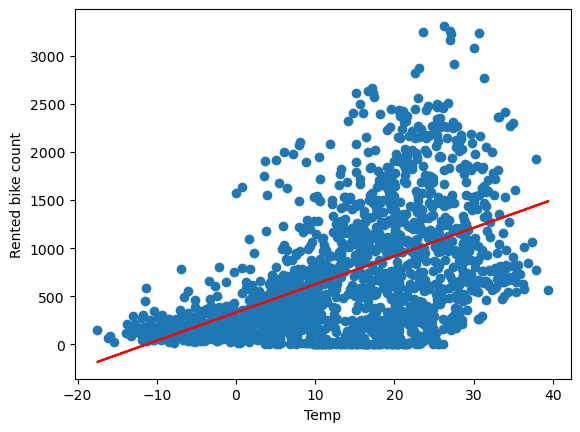

In [26]:
plt.plot(X_test['Temperature'],y_test,'o')
plt.plot(X_test['Temperature'], y_pred, 'r')
plt.xlabel('Temp')
plt.ylabel('Rented bike count')
plt.show()

 - 시간으로 ( Hour ) 자전거 대여량을 에측하는 선형회귀 모델 만들고 평가 ( MAE , R^2 )


In [27]:
reg.fit(X=X_train[['Hour']],y=y_train)

LinearRegression()

In [28]:
y_pred = reg.predict(X_test[['Hour']])

In [29]:
mean_absolute_error(y_true=y_test , y_pred=y_pred)

469.80445700960956

In [30]:
r2_score(y_true=y_test , y_pred=y_pred)

0.15466121738474936

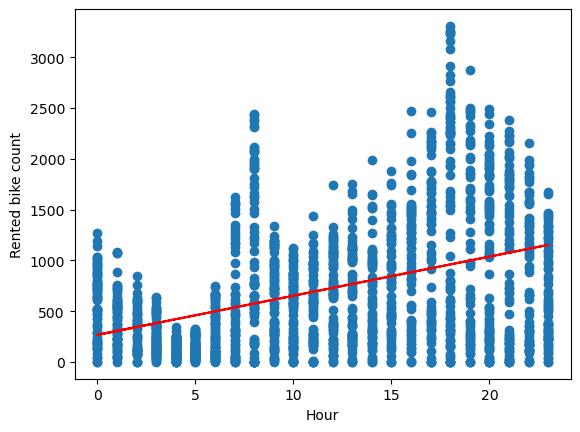

In [31]:
plt.plot(X_test['Hour'],y_test,'o')
plt.plot(X_test['Hour'], y_pred, 'r')
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.show()

In [32]:
mean_absolute_error(y_true=y_test , y_pred=y_pred)

469.80445700960956

In [33]:
r2_score(y_true=y_test , y_pred=y_pred)

0.15466121738474936

- 기온과 강술향 선형회귀 모델 만들기 

In [34]:
reg = LinearRegression().fit(X_train[['Temperature','Rainfall']], y_train)

In [35]:
print('w_0 : ' , reg.intercept_)

w_0 :  338.97557266539593


In [36]:
print('w_1 , w_2 : ' , reg.coef_)

w_1 , w_2 :  [ 29.72014948 -82.72010431]


In [37]:
y_pred = reg.predict(X_test[['Temperature','Rainfall']])
mean_absolute_error(y_test,y_pred) , r2_score(y_test , y_pred)

(407.655844222717, 0.28706003242192835)

- 모든 입력 변수를 다 활용하여 자전거 대여량 예측 선형회귀 모델 만들기

In [38]:
reg = LinearRegression().fit(X_train,y_train)

In [39]:
y_pred = reg.predict(X_test)
mean_absolute_error(y_test,y_pred) , r2_score(y_test , y_pred)

(310.872983196479, 0.5833302658222703)

## Numpy 를 활용해서 최소 제곡법으로 선형 회귀 구현   
- (X^TX)^{-1}X^Ty$ 를 계산하여 $w$를 계산 => 331.78, 29.34가 나와야함


In [40]:
# X
np.ones((2,2)) # X_0 = 1 , X_1 = 온도

array([[1., 1.],
       [1., 1.]])

In [41]:
X_train[['Temperature']].shape

(7008, 1)

In [42]:
X_train_matrix = np.ones((7008,2)) # 2 = ( 사용하는 변수의 개수 ( 온도 1 개 ) + 1) -> w의 개수도 2개가 됨
X_train_matrix[:,1] = X_train['Temperature']

In [43]:
X_train_matrix[:3,:]

array([[ 1. ,  8.2],
       [ 1. , 28.4],
       [ 1. , 29.9]])

In [44]:
# ( X^T X)^-1

left_side = np.linalg.inv(np.matmul(X_train_matrix.T , X_train_matrix))
left_side.shape

(2, 2)

In [45]:
middle = np.matmul(left_side , X_train_matrix.T)
middle.shape

(2, 7008)

In [46]:
w_hat = np.matmul(middle,y_train)
w_hat.shape

(2,)

In [47]:
# [ w_0 , w_1 ]

w_hat

array([331.78038017,  29.34160985])

In [48]:
reg = LinearRegression().fit(X_train[['Temperature']],y_train)

In [49]:
reg.intercept_

331.78038016740726

In [50]:
reg.coef_

array([29.34160985])

## 다항 회귀 분석 ( Polynomial Regression)

- 기온과 자전거 대여량에 대한 3차 Polynomial Regression


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [53]:
poly = PolynomialFeatures(degree=3) # 3차 다항 회귀 분석

In [54]:
X_train.shape

(7008, 29)

In [55]:
X_train_poly = poly.fit_transform(X_train[['Temperature']])
X_train_poly.shape # 'Temp^0 , Temp^1 , Temp^2 , Temp^3

(7008, 4)

In [56]:
X_train_poly[0,:]

array([  1.   ,   8.2  ,  67.24 , 551.368])

In [57]:
X_train_poly[1,:]

array([1.0000000e+00, 2.8400000e+01, 8.0656000e+02, 2.2906304e+04])

In [58]:
X_train_poly[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
pd.Series(X_train_poly[:,0]).unique()

array([1.])

In [60]:
set(X_train_poly[:,0])

{1.0}

In [61]:
X_test_poly = poly.fit_transform(X_test[['Temperature']])
X_test_poly.shape

(1752, 4)

In [62]:
poly_reg = LinearRegression()

In [64]:
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [65]:
X_train_poly.shape , y_train.shape

((7008, 4), (7008,))

In [66]:
poly_reg.intercept_

255.08931077743682

In [67]:
poly_reg.coef_

array([ 0.        , 26.11750147,  1.22824476, -0.03565222])

In [77]:
y_pred = poly_reg.predict(X_test_poly)

In [72]:
mean_absolute_error(y_test,y_pred) , r2_score(y_test,y_pred)

(404.768953067643, 0.27123373186980115)

Text(0, 0.5, 'Rented bike Count')

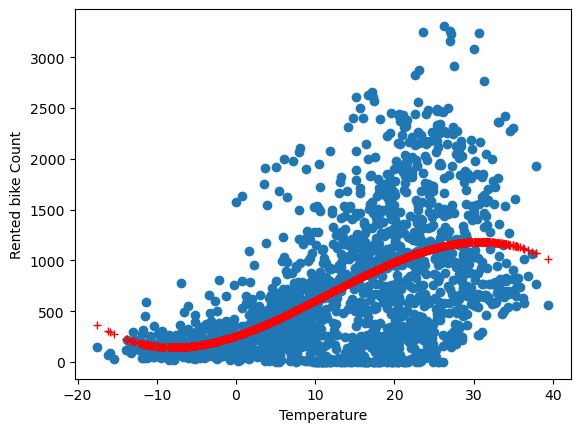

In [79]:
plt.plot(X_test['Temperature'], y_test, 'o')
plt.plot(X_test['Temperature'], y_pred ,'r+')
plt.xlabel('Temperature')
plt.ylabel('Rented bike Count')

#### Hour 에 대한 Polynomial Regression 모델 만들기 

In [80]:
X_train_poly = poly.fit_transform(X_train[['Hour']])
X_train_poly.shape # 'Temp^0 , Temp^1 , Temp^2 , Temp^3

(7008, 4)

In [ ]:
X_train_poly = poly.fit_transform(X_train['Hour'])
X_test_poly = poly.fit_transform(X_test[['Hour']])
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred = poly_reg.predict(X_test_poly)

In [81]:
X_test_poly = poly.fit_transform(X_test[['Hour']])
X_test_poly.shape

(1752, 4)

In [82]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [84]:
y_pred = poly_reg.predict(X_test_poly)

Text(0, 0.5, 'Rented bike Count')

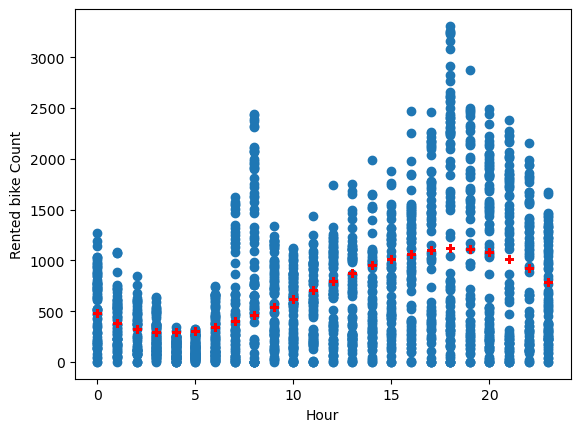

In [85]:
plt.plot(X_test['Hour'], y_test, 'o')
plt.plot(X_test['Hour'], y_pred ,'r+')
plt.xlabel('Hour')
plt.ylabel('Rented bike Count')

In [86]:
mean_absolute_error(y_test,y_pred) , r2_score(y_test,y_pred)

(447.47962084322535, 0.20224593193153018)

- 온도와 강수량에 대한 3차 Polynomial Regression

In [88]:
X_train_poly = poly.fit_transform(X_train[['Temperature','Rainfall']])
X_test_poly = poly.fit_transform(X_test[['Temperature','Rainfall']])
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred = poly_reg.predict(X_test_poly)

In [89]:
mean_absolute_error(y_test,y_pred) , r2_score(y_test,y_pred)

(389.0645004693593, 0.31707559993280854)

In [ ]:
plt.plot(X_test['Temperature'], y_test, 'o')
plt.plot(X_test['Hour'], y_pred ,'r+')
plt.xlabel('Hour')
plt.ylabel('Rented bike Count')